In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
canton_df = gpd.read_file("/Users/connorhughes/Documents/GitHub/Covid19-Geospatial-Analysis/CHE_adm/CHE_adm1.shp")
canton_df.drop(["ID_0","ISO","NAME_0","ID_1","TYPE_1","ENGTYPE_1","NL_NAME_1","VARNAME_1"], axis=1, inplace=True)
canton_df.head()

,NAME_1,geometry
0,Aargau,"POLYGON ((8.22503 47.61147, 8.22661 47.61130, ..."
1,Appenzell Ausserrhoden,"POLYGON ((9.54239 47.47059, 9.54387 47.47031, ..."
2,Appenzell Innerrhoden,"MULTIPOLYGON (((9.37930 47.38512, 9.37944 47.3..."
3,Basel-Landschaft,"MULTIPOLYGON (((7.38339 47.41924, 7.38057 47.4..."
4,Basel-Stadt,"POLYGON ((7.67336 47.58182, 7.67500 47.57977, ..."


In [3]:
new_df = pd.read_excel("/Users/connorhughes/Documents/GitHub/Covid19-Geospatial-Analysis/kanton codes.xlsx")
 
canton_df = canton_df.merge(new_df, left_index=True, right_index=True)
#canton_df.drop(["Name_x"], axis=1, inplace=True)
canton_df.head()

canton_list = canton_df["NAME_1"].tolist()

In [4]:
#Get most recent results
try:
    covid_df = pd.read_csv("https://raw.githubusercontent.com/openZH/covid_19/master/COVID19_Fallzahlen_CH_total_v2.csv")

    #update the excel sheet with the most up to date data
    covid_df.to_excel("/Users/connorhughes/Documents/GitHub/Covid19-Geospatial-Analysis/Backup_Data.xlsx")

except:
    covid_df = pd.read_excel("/Users/connorhughes/Documents/GitHub/Covid19-Geospatial-Analysis/Backup_Data.xlsx")

covid_df.head()

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel
0,2020-01-24,NaN,GE,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/20094/annexe/0,NaN,NaN,NaN
1,2020-01-25,NaN,GE,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN
2,2020-01-26,NaN,GE,11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN
3,2020-01-27,NaN,GE,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN
4,2020-01-28,NaN,GE,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN


In [5]:
covid_df

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel
0,2020-01-24,NaN,GE,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/20094/annexe/0,NaN,NaN,NaN
1,2020-01-25,NaN,GE,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN
2,2020-01-26,NaN,GE,11.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN
3,2020-01-27,NaN,GE,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN
4,2020-01-28,NaN,GE,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ge.ch/document/21502/telecharger,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,2020-11-22,NaN,NW,NaN,853.0,NaN,7.0,3.0,NaN,NaN,8.0,https://www.nw.ch/gesundheitsamtdienste/6044,104.0,120.0,1.0
6570,2020-11-22,NaN,TI,NaN,14129.0,NaN,375.0,35.0,20.0,1357.0,491.0,https://www4.ti.ch/fileadmin/DSS/DSP/UMC/malat...,NaN,NaN,NaN
6571,2020-11-22,08:00,BE,NaN,25671.0,NaN,NaN,NaN,NaN,NaN,313.0,https://www.besondere-lage.sites.be.ch/besonde...,NaN,NaN,NaN
6572,2020-11-22,08:00,ZG,NaN,2982.0,NaN,23.0,5.0,NaN,2535.0,27.0,https://www.zg.ch/behoerden/gesundheitsdirekti...,NaN,NaN,NaN


In [6]:
covid_df.drop(columns=["time", "ncumul_tested", "new_hosp", "current_hosp", "current_icu", "current_vent", "ncumul_released", "source", "current_isolated", "current_quarantined"], axis=1, inplace=True)
covid_df["date"] = covid_df["date"].apply(lambda x: pd.to_datetime(x))
covid_df.head()

,date,abbreviation_canton_and_fl,ncumul_conf,ncumul_deceased,current_quarantined_riskareatravel
0,2020-01-24,GE,NaN,NaN,NaN
1,2020-01-25,GE,0.0,NaN,NaN
2,2020-01-26,GE,0.0,NaN,NaN
3,2020-01-27,GE,0.0,NaN,NaN
4,2020-01-28,GE,0.0,NaN,NaN


In [7]:
covid_df = covid_df[covid_df["abbreviation_canton_and_fl"] != "FL"]
covid_df.reset_index(drop=True, inplace=True)
covid_df.head()

,date,abbreviation_canton_and_fl,ncumul_conf,ncumul_deceased,current_quarantined_riskareatravel
0,2020-01-24,GE,NaN,NaN,NaN
1,2020-01-25,GE,0.0,NaN,NaN
2,2020-01-26,GE,0.0,NaN,NaN
3,2020-01-27,GE,0.0,NaN,NaN
4,2020-01-28,GE,0.0,NaN,NaN


In [8]:
#Make a master df with every date and every canton

#Use full range of covid data for dates
dates = pd.date_range(covid_df["date"].iloc[0].date(), covid_df["date"].iloc[-1].date(), freq='d')
cantons = new_df["Name"]

list_of_dates = []
list_of_cantons = []

for canton in cantons:
    for date in dates:
        list_of_cantons.append(canton)
        list_of_dates.append(date.date())

covid_df_clean = pd.DataFrame({"Date": list_of_dates, "Canton": list_of_cantons})
covid_df_clean["Cumulative Cases"] = np.nan * len(covid_df_clean)

covid_df_clean

,Date,Canton,Cumulative Cases
0,2020-01-24,AG,NaN
1,2020-01-25,AG,NaN
2,2020-01-26,AG,NaN
3,2020-01-27,AG,NaN
4,2020-01-28,AG,NaN
...,...,...,...
7899,2020-11-18,ZG,NaN
7900,2020-11-19,ZG,NaN
7901,2020-11-20,ZG,NaN
7902,2020-11-21,ZG,NaN


In [9]:
for i in range(len(covid_df)):
    
    if (int(i % (len(covid_df)/10)) == 0):
        display(str(int((100 * i)/len(covid_df))) + "% done")
    
    current_date = covid_df.iloc[i]["date"].date()
    current_canton = covid_df.iloc[i]["abbreviation_canton_and_fl"]
    
    #display(current_date)
    #display(current_canton)
    
    key_names = ["Date", "Canton"]
    keys = [current_date, current_canton]
    
    
    clean_index = int(np.where(covid_df_clean[key_names].isin(keys).all(1))[0][0])
    #display(clean_index)
    
    covid_df_clean["Cumulative Cases"].iloc[clean_index] = covid_df.iloc[i]["ncumul_conf"]
    
covid_df_clean

'0% done'

'10% done'

'20% done'

'30% done'

'40% done'

'50% done'

'60% done'

'70% done'

'80% done'

'90% done'

,Date,Canton,Cumulative Cases
0,2020-01-24,AG,NaN
1,2020-01-25,AG,NaN
2,2020-01-26,AG,NaN
3,2020-01-27,AG,NaN
4,2020-01-28,AG,NaN
...,...,...,...
7899,2020-11-18,ZG,2766.0
7900,2020-11-19,ZG,2835.0
7901,2020-11-20,ZG,2883.0
7902,2020-11-21,ZG,2943.0


In [10]:
for i in range(len(covid_df_clean["Cumulative Cases"])):
    #check if value is missing
    if pd.isnull(covid_df_clean["Cumulative Cases"].iloc[i]):
        #If its at the begining of a canton's data make it 0
        if ((i == 0) or (covid_df_clean["Canton"].iloc[i] != covid_df_clean["Canton"].iloc[i-1])):
            covid_df_clean["Cumulative Cases"].iloc[i] = 0
        else:
            #if its not at the begining make it equal to the last one
            covid_df_clean["Cumulative Cases"].iloc[i] = covid_df_clean["Cumulative Cases"].iloc[i-1]


display(covid_df_clean)

,Date,Canton,Cumulative Cases
0,2020-01-24,AG,0.0
1,2020-01-25,AG,0.0
2,2020-01-26,AG,0.0
3,2020-01-27,AG,0.0
4,2020-01-28,AG,0.0
...,...,...,...
7899,2020-11-18,ZG,2766.0
7900,2020-11-19,ZG,2835.0
7901,2020-11-20,ZG,2883.0
7902,2020-11-21,ZG,2943.0


In [14]:
#Check current total across switzerland
#Also find max cases for any one canton to help with plotting later

my_sum = 0
max_cases = 0

for canton, cum_cases_list in covid_df_clean.groupby("Canton")["Cumulative Cases"]:
    #display(canton)
    #display(cum_cases_list.iloc[-1])
    my_sum += cum_cases_list.iloc[-1]
    
    if (cum_cases_list.iloc[-1] > max_cases):
        max_cases = cum_cases_list.iloc[-1]
    
display("Total: " + str(my_sum))
display(max_cases)

'Total: 288425.0'

45214.0

In [15]:
#Define a function to get cumulative cases geopandas df for a particlar date
def get_cases_on(a_date):
    days_cases = covid_df_clean[covid_df_clean["Date"] == a_date].set_index("Canton")["Cumulative Cases"]
    return canton_df.merge(days_cases, left_on = "Name", right_index=True)

,NAME_1,geometry,Name,Cumulative Cases
0,Aargau,"POLYGON ((8.22503 47.61147, 8.22661 47.61130, ...",AG,10156.0
1,Appenzell Ausserrhoden,"POLYGON ((9.54239 47.47059, 9.54387 47.47031, ...",AR,987.0
2,Appenzell Innerrhoden,"MULTIPOLYGON (((9.37930 47.38512, 9.37944 47.3...",AI,401.0
3,Basel-Landschaft,"MULTIPOLYGON (((7.38339 47.41924, 7.38057 47.4...",BL,3623.0
4,Basel-Stadt,"POLYGON ((7.67336 47.58182, 7.67500 47.57977, ...",BS,3076.0


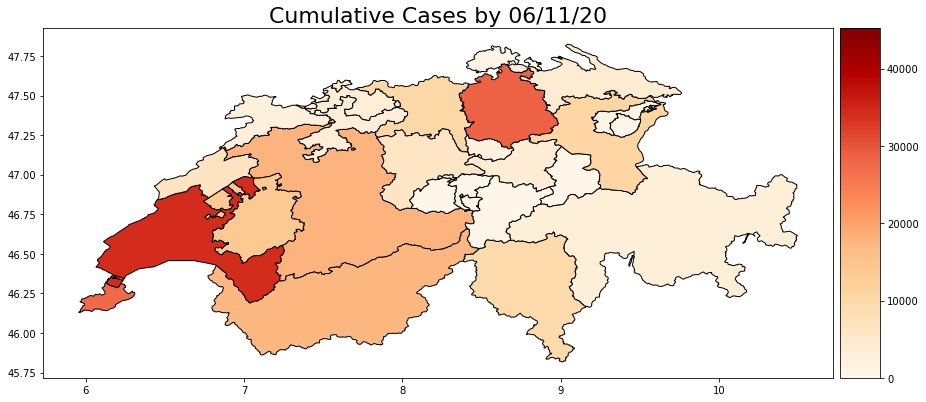

In [20]:
#Make an example cumulative cases image for read_me file

'''
test = get_cases_on(pd.to_datetime("6/11/20", dayfirst=True))
display(test.head())

#Deal with legend
fig, ax = plt.subplots(1,1, figsize=(15,15))

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

test.plot(ax=ax, cax=cax, column="Cumulative Cases", edgecolor="black", cmap="OrRd", vmin=0, vmax=max_cases, legend=True)
ax.set_title("Cumulative Cases by 06/11/20", fontsize=22)

plt.savefig("/Users/connorhughes/Desktop/cumulative_ex_2020-11-06.png", bbox_inches='tight')
'''

In [22]:
def get_plot_by_date(a_date_str):
    data = get_cases_on(pd.to_datetime(a_date_str))
    
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    
    #Deal with legend
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    data.plot(ax=ax, cax=cax, column="Cumulative Cases", edgecolor="black", cmap="OrRd", vmin=0, vmax=max_cases, legend=True)
    ax.set_title(a_date_str, fontsize=22)

    #Optional code to save figs without displaying
    pathname = "/Users/connorhughes/Documents/GitHub/Covid19-Geospatial-Analysis/Cumulative Cases Map (by day)/" + a_date_str
    
    plt.savefig(pathname)
    plt.close()

In [23]:
def get_plots_by_date_range(start_date_str, end_date_str):

    start_date_formatted = pd.to_datetime(start_date_str).date()
    end_date_formatted = pd.to_datetime(end_date_str).date()

    
    for date in [d.strftime('%Y-%m-%d') for d in pd.date_range(start_date_formatted,end_date_formatted)]:
       get_plot_by_date(date)

In [24]:
todays_date = str(covid_df["date"].iloc[-1].strftime('%Y/%m/%d'))
todays_date

'2020/11/22'

In [74]:
#get_plots_by_date_range("2020/01/24", todays_date)

In [25]:
canton_list_full = ['Aargau',
 'Appenzell Ausserrhoden',
 'Appenzell Innerrhoden',
 'Basel-Landschaft',
 'Basel-Stadt',
 'Bern',
 'Fribourg',
 'Genève',
 'Glarus',
 'Graubünden',
 'Jura',
 'Lucerne',
 'Neuchâtel',
 'Nidwalden',
 'Obwalden',
 'Sankt Gallen',
 'Schaffhausen',
 'Schwyz',
 'Solothurn',
 'Thurgau',
 'Ticino',
 'Uri',
 'Valais',
 'Vaud',
 'Zürich',
 'Zug']

In [29]:
#Use the functions defined in the daily cases file 
from Daily_Cases_Functions import make_df_across_all_cantons_and_dates

start = pd.to_datetime("24/01/20", dayfirst=True).date()
end = pd.to_datetime(todays_date, dayfirst=True).date()

covid_df_per_day = make_df_across_all_cantons_and_dates(start, end, cantons)

covid_df_per_day

,Date,Canton,Cases on that day
0,2020-01-24,AG,NaN
1,2020-01-25,AG,NaN
2,2020-01-26,AG,NaN
3,2020-01-27,AG,NaN
4,2020-01-28,AG,NaN
...,...,...,...
7899,2020-11-18,ZG,NaN
7900,2020-11-19,ZG,NaN
7901,2020-11-20,ZG,NaN
7902,2020-11-21,ZG,NaN


In [30]:
#Use already made cumulative df to calculate cases per day

for canton in covid_df_per_day["Canton"].unique():
    current_canton = covid_df_clean[covid_df_clean["Canton"] == canton]
    current_canton.reset_index(drop=True, inplace=True)

    to_append = []
    for i in range(0, len(current_canton)-1):
        to_append.append(current_canton["Cumulative Cases"].iloc[i+1] - current_canton["Cumulative Cases"].iloc[i])

    #Add placeholder 0 cases for the final day
    to_append.append(0)

    
    
    covid_df_per_day.loc[covid_df_per_day["Canton"] == canton, "Cases on that day"] = to_append

In [31]:
covid_df_per_day

,Date,Canton,Cases on that day
0,2020-01-24,AG,0.0
1,2020-01-25,AG,0.0
2,2020-01-26,AG,0.0
3,2020-01-27,AG,0.0
4,2020-01-28,AG,0.0
...,...,...,...
7899,2020-11-18,ZG,69.0
7900,2020-11-19,ZG,48.0
7901,2020-11-20,ZG,60.0
7902,2020-11-21,ZG,39.0


In [33]:
max_daily_cases = covid_df_per_day["Cases on that day"].max()
max_daily_cases

1642.0

In [34]:
#Define a function to get daily cases geopandas df for a particlar date
def get_daily_cases_on(a_date):
    days_cases = covid_df_per_day[covid_df_per_day["Date"] == a_date].set_index("Canton")["Cases on that day"]
    return canton_df.merge(days_cases, left_on = "Name", right_index=True)

In [ ]:
#Make an example daily cases image for read_me file


test = get_daily_cases_on(pd.to_datetime("9/04/20", dayfirst=True))
display(test.head())

#Deal with legend
fig, ax = plt.subplots(1,1, figsize=(15,15))

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

test.plot(ax=ax, cax=cax, column="Cumulative Cases", edgecolor="black", cmap="OrRd", vmin=0, vmax=max_cases, legend=True)
ax.set_title("Daily Cases on 04/08/20", fontsize=22)

plt.savefig("/Users/connorhughes/Desktop/daily_example_2020-08-04.png", bbox_inches='tight')
